In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("homeprices_banglore.csv")
df.head

<bound method NDFrame.head of     area  bedrooms   price
0   1056         2   39.07
1   2600         4  120.00
2   1440         3   62.00
3   1521         3   75.00
4   1200         2   51.00
5   1170         2   38.00
6   2732         4  135.00
7   3300         4  155.00
8   1310         3   50.00
9   3700         5  167.00
10  1800         3   82.00
11  2785         4  140.00
12  1000         2   38.00
13  1100         2   40.00
14  2250         3  101.00
15  1175         2   42.00
16  1180         3   48.00
17  1540         3   60.00
18  2770         3  102.00
19   800         1   32.00>

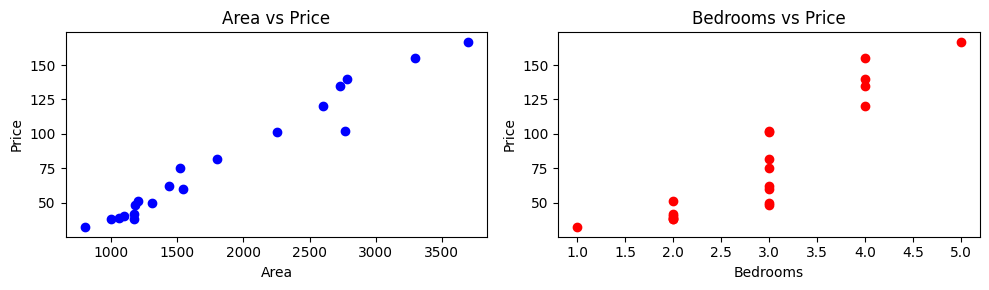

In [96]:


fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 1 row, 3 columns

axes[0].scatter(df.area, df.price, color="blue")
axes[0].set_title("Area vs Price")
axes[0].set_xlabel("Area")
axes[0].set_ylabel("Price")

axes[1].scatter(df.bedrooms, df.price, color="red")
axes[1].set_title("Bedrooms vs Price")
axes[1].set_xlabel("Bedrooms")
axes[1].set_ylabel("Price")

plt.tight_layout()  
plt.show()


Preprocessing/Scaling

In [97]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [98]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [99]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

price = w1*area + w2*bedrooms + bias

In [100]:
def batch_gradient_descend(X,y_true,epochs,learning_rate=.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0    
    total_sample = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w,X.T)+b
        cost = np.mean(np.square(y_true-y_predicted))
        
        w_gradient = -(2/total_sample)*(X.T.dot(y_true-y_predicted))
        b_gradient = -(2/total_sample)*np.sum(y_true-y_predicted) 
        
        w = w-learning_rate*w_gradient 
        b = b-learning_rate*b_gradient 
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

In [101]:
w,b,cost,cost_list,epoch_list= batch_gradient_descend(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w,b,cost

(array([0.66469087, 0.60541671]),
 np.float64(-0.17792104056392885),
 np.float64(0.004865480818348847))

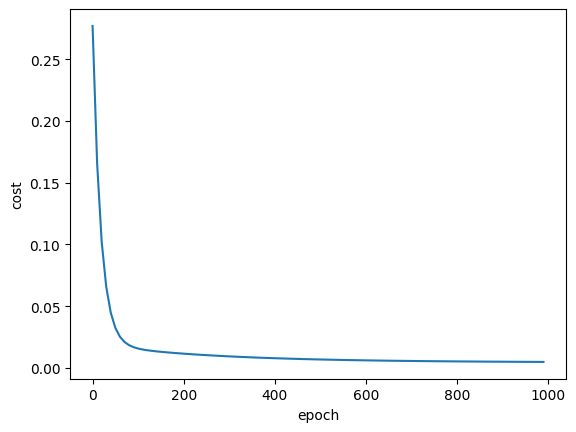

In [102]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [103]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [104]:
predict(2600,4,w,b)  

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(124.97561189905038)

In [105]:
predict(1540,3,w,b)  

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(71.74374167782446)

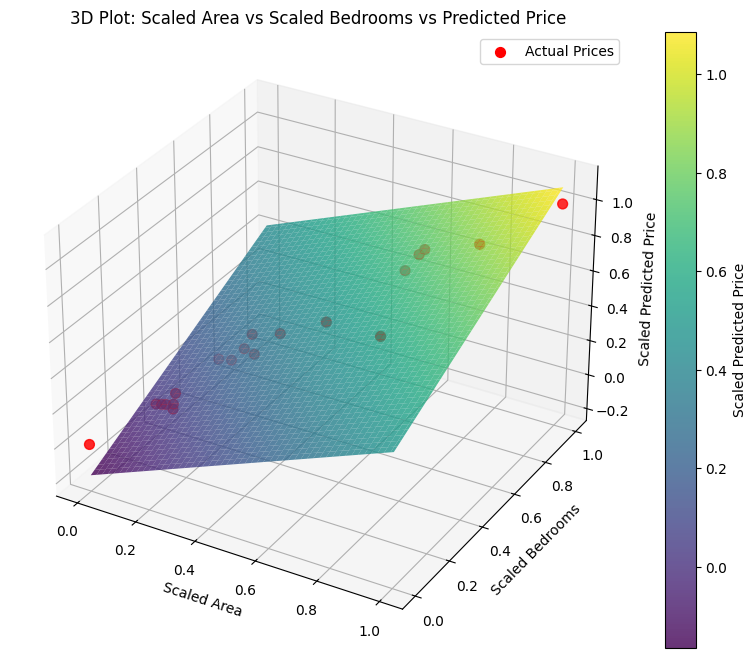

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add scaled_x and scaled_y to the DataFrame
df['scaled_area'] = scaled_x[:, 0]  # First column of scaled_x (scaled area)
df['scaled_bedrooms'] = scaled_x[:, 1]  # Second column of scaled_x (scaled bedrooms)
df['scaled_price'] = scaled_y  # Scaled target variable

# Calculate predicted prices using the learned weights (w) and bias (b)
df['predicted_price'] = w[0] * df['scaled_area'] + w[1] * df['scaled_bedrooms'] + b

# Create a meshgrid for scaled_area and scaled_bedrooms
area_range = np.linspace(df['scaled_area'].min(), df['scaled_area'].max(), 100)
bedrooms_range = np.linspace(df['scaled_bedrooms'].min(), df['scaled_bedrooms'].max(), 100)
area_grid, bedrooms_grid = np.meshgrid(area_range, bedrooms_range)

# Calculate predicted prices for the meshgrid
predicted_price_grid = w[0] * area_grid + w[1] * bedrooms_grid + b

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(area_grid, bedrooms_grid, predicted_price_grid, cmap='viridis', alpha=0.8)

# Add scatter plot of actual data points
ax.scatter(df['scaled_area'], df['scaled_bedrooms'], df['scaled_price'], color='red', label='Actual Prices', s=50)

# Add color bar
cbar = fig.colorbar(surface)
cbar.set_label('Scaled Predicted Price')

# Add labels and title
ax.set_title("3D Plot: Scaled Area vs Scaled Bedrooms vs Predicted Price")
ax.set_xlabel("Scaled Area")
ax.set_ylabel("Scaled Bedrooms")
ax.set_zlabel("Scaled Predicted Price")

# Add legend
ax.legend()

# Show the plot
plt.show()

(2) Stochastic Gradient Descent Implementation


In [107]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        random_x = X[random_index]
        random_y = y_true[random_index]
        
        y_predict = np.dot(w, random_x.T) + b
        
        w_grad = -(2/total_samples) * (random_y - y_predict) * random_x
        b_grad = -(2/total_samples) * (random_y - y_predict)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # Calculate cost over the entire dataset
        cost = np.square(random_y - y_predict)
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
# Assuming scaled_x and scaled_y are your scaled features and target values
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70571359, 0.67361175]),
 np.float64(-0.22908033532475958),
 np.float64(0.010855768288697628))

In [108]:
w,b,cost

(array([0.66469087, 0.60541671]),
 np.float64(-0.17792104056392885),
 np.float64(0.004865480818348847))

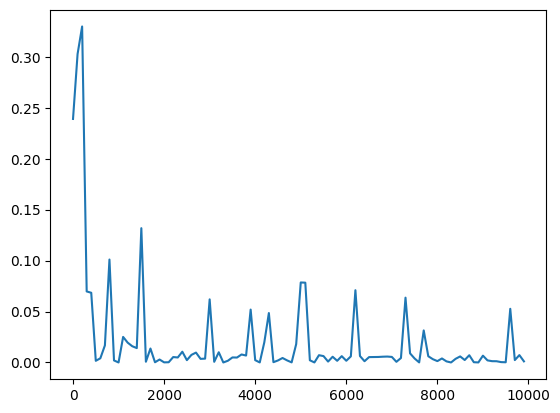

In [109]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

In [110]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.4112763714062)

In [111]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.378988122546918)

Implement mini batch gradient descent

In [ ]:
def mini_batch_gradient_descent(X,y_ture,epoch,learning_rate=.01):
    number_of_features=X.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = X.shape[0]
    m=50
    
    for i in range(epoch):            
        sample_x = X[i]
        sample_y = y_ture[i]
        y_predicted = np.dot(w,sample_x.T)
        
        w_grad = -(2/total_samples)*(y_predicted-y_ture)*sample_x
        b_grad = -(2/total_samples)*(y_predicted-y_ture)
        
        w = w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
    
    return